In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import keras


In [2]:
data = web.get_data_yahoo('MSFT',start = "2010-01-01",
                            end = "2022-02-13")

train = web.get_data_yahoo("MSFT",
                            start = "2010-01-01",
                            end = "2022-01-14")

test = web.get_data_yahoo("MSFT",
                            start = "2022-01-14",
                            end = "2022-02-13")



train.shape

(3031, 6)

In [3]:
# code for NVDA data

# data = web.get_data_yahoo('NVDA',start = "2010-01-01",
#                             end = "2022-02-13")

# train = web.get_data_yahoo("NVDA",
#                             start = "2010-01-01",
#                             end = "2022-01-14")

# test = web.get_data_yahoo("NVDA",
#                             start = "2022-01-14",
#                             end = "2022-02-13")

In [4]:
# code for FB data

# data = web.get_data_yahoo('FB',start = "2010-01-01",
#                             end = "2022-02-13")

# train = web.get_data_yahoo("FB",
#                             start = "2010-01-01",
#                             end = "2022-01-14")

# test = web.get_data_yahoo("FB",
#                             start = "2022-01-14",
#                             end = "2022-02-13")

C:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


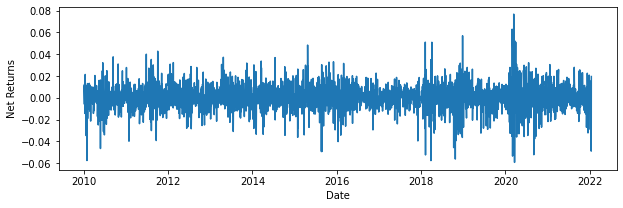

In [5]:
# calculating the returns 
fig = plt.figure(figsize = (10,3))

train['Net_Returns'] = np.divide(train['Close'],train['Open'])-1

sns.lineplot(train.index,train['Net_Returns'])

plt.ylabel('Net Returns')

plt.show()
fig.savefig('net_returns_train.png') 
plt.close(fig) 

In [6]:
train_arr = np.array(train.Close).reshape(-1,1)
train_arr.shape

(3031, 1)

In [7]:
normalizer = MinMaxScaler((0,1))
normalized_train = normalizer.fit_transform(train)

In [14]:
inputs = list()
targets = list()

lr_days = 60
train_len = train_arr.shape[0]

for day in range(lr_days, train_len):
    
    inputs.append(normalized_train[day-lr_days:day, 0])
    
    targets.append(normalized_train[day, 0])
    
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))

targets = np.array(targets)
dim_2 = inputs.shape[2]
print(inputs.shape)
print(targets)#5486


(2971, 60, 1)
[0.01961085 0.0190593  0.01872223 ... 0.91953422 0.91178181 0.88095602]


In [16]:
lstm_net = keras.Sequential(
    [
    
    keras.layers.LSTM(50,return_sequences=True,recurrent_activation="sigmoid",input_shape=(lr_days, dim_2)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),


    keras.layers.LSTM(50),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1)

    ]
)

In [21]:
inputs.shape[1]

60

In [22]:
lstm_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [19]:
lstm_net.fit(inputs, targets, epochs = 150, batch_size = 32)

Epoch 1/150
93/93 [==============================] - 14s 44ms/step - loss: 0.0056 - accuracy: 6.7317e-04
Epoch 2/150
93/93 [==============================] - 4s 44ms/step - loss: 0.0019 - accuracy: 6.7317e-04
Epoch 3/150
93/93 [==============================] - 4s 42ms/step - loss: 9.3759e-04 - accuracy: 6.7317e-04
Epoch 4/150
93/93 [==============================] - 4s 42ms/step - loss: 0.0011 - accuracy: 6.7317e-04
Epoch 5/150
93/93 [==============================] - 4s 42ms/step - loss: 0.0013 - accuracy: 6.7317e-04
Epoch 6/150
93/93 [==============================] - 4s 43ms/step - loss: 0.0012 - accuracy: 6.7317e-04
Epoch 7/150
93/93 [==============================] - 4s 43ms/step - loss: 9.7295e-04 - accuracy: 6.7317e-04
Epoch 8/150
93/93 [==============================] - 4s 42ms/step - loss: 0.0011 - accuracy: 6.7317e-04
Epoch 9/150
93/93 [==============================] - 4s 41ms/step - loss: 7.9368e-04 - accuracy: 6.7317e-04
Epoch 10/150
93/93 [==============================]

93/93 [==============================] - 4s 45ms/step - loss: 3.8818e-04 - accuracy: 6.7317e-04
Epoch 77/150
93/93 [==============================] - 4s 45ms/step - loss: 4.2330e-04 - accuracy: 6.7317e-04
Epoch 78/150
93/93 [==============================] - 4s 44ms/step - loss: 4.0827e-04 - accuracy: 6.7317e-04
Epoch 79/150
93/93 [==============================] - 4s 45ms/step - loss: 3.9943e-04 - accuracy: 6.7317e-04
Epoch 80/150
93/93 [==============================] - 4s 46ms/step - loss: 4.3769e-04 - accuracy: 6.7317e-04
Epoch 81/150
93/93 [==============================] - 4s 45ms/step - loss: 3.6039e-04 - accuracy: 6.7317e-04
Epoch 82/150
93/93 [==============================] - 5s 49ms/step - loss: 4.3699e-04 - accuracy: 6.7317e-04
Epoch 83/150
93/93 [==============================] - 4s 45ms/step - loss: 4.1484e-04 - accuracy: 6.7317e-04
Epoch 84/150
93/93 [==============================] - 4s 47ms/step - loss: 4.1367e-04 - accuracy: 6.7317e-04
Epoch 85/150
93/93 [============

93/93 [==============================] - 4s 38ms/step - loss: 3.2215e-04 - accuracy: 6.7317e-04


In [23]:
print(lstm_net.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            2

In [24]:
test_targets = np.array(test.Close).reshape(-1,1)
test_targets.shape


(20, 1)

In [25]:


days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(lstm_net.predict(test_i))




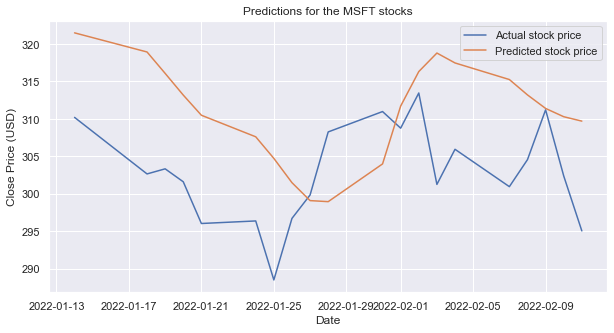

In [26]:
sns.set()
fig = plt.figure(figsize = (10,5))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the MSFT stocks')
plt.legend(labels=["Actual stock price","Predicted stock price"])
plt.ylabel("Close Price (USD)")

plt.show()
fig.savefig('MSFT.png') 
plt.close(fig) 



In [27]:
# testing the code using other datasets

In [28]:
# baseline model 
baseline_net = keras.Sequential(
    [
    keras.layers.SimpleRNN(50, input_shape=(inputs.shape[1],1), activation='linear'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1, activation='linear')

    ]
)

baseline_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [29]:
baseline_net.fit(inputs, targets, epochs = 150, batch_size = 32)

Epoch 1/150
93/93 [==============================] - 5s 53ms/step - loss: 0.0170 - accuracy: 6.7317e-04
Epoch 2/150
93/93 [==============================] - 5s 52ms/step - loss: 0.0028 - accuracy: 6.7317e-04
Epoch 3/150
93/93 [==============================] - 5s 50ms/step - loss: 0.0018 - accuracy: 6.7317e-04
Epoch 4/150
93/93 [==============================] - 5s 51ms/step - loss: 0.0014 - accuracy: 6.7317e-04
Epoch 5/150
93/93 [==============================] - 5s 57ms/step - loss: 0.0013 - accuracy: 6.7317e-04
Epoch 6/150
93/93 [==============================] - 5s 57ms/step - loss: 0.0010 - accuracy: 6.7317e-04
Epoch 7/150
93/93 [==============================] - 5s 59ms/step - loss: 0.0010 - accuracy: 6.7317e-04
Epoch 8/150
93/93 [==============================] - 5s 58ms/step - loss: 7.6683e-04 - accuracy: 6.7317e-04
Epoch 9/150
93/93 [==============================] - 6s 61ms/step - loss: 8.2167e-04 - accuracy: 6.7317e-04
Epoch 10/150
93/93 [==============================] - 6s

93/93 [==============================] - 5s 57ms/step - loss: 1.9151e-04 - accuracy: 6.7317e-04
Epoch 77/150
93/93 [==============================] - 5s 53ms/step - loss: 2.4143e-04 - accuracy: 6.7317e-04
Epoch 78/150
93/93 [==============================] - 5s 53ms/step - loss: 2.1254e-04 - accuracy: 6.7317e-04
Epoch 79/150
93/93 [==============================] - 5s 52ms/step - loss: 2.3012e-04 - accuracy: 6.7317e-04
Epoch 80/150
93/93 [==============================] - 5s 53ms/step - loss: 2.0194e-04 - accuracy: 6.7317e-04
Epoch 81/150
93/93 [==============================] - 5s 52ms/step - loss: 2.0238e-04 - accuracy: 6.7317e-04
Epoch 82/150
93/93 [==============================] - 5s 54ms/step - loss: 2.0465e-04 - accuracy: 6.7317e-04
Epoch 83/150
93/93 [==============================] - 5s 57ms/step - loss: 2.1764e-04 - accuracy: 6.7317e-04
Epoch 84/150
93/93 [==============================] - 5s 57ms/step - loss: 2.0598e-04 - accuracy: 6.7317e-04
Epoch 85/150
93/93 [============

93/93 [==============================] - 6s 61ms/step - loss: 2.0298e-04 - accuracy: 6.7317e-04


In [30]:
print(baseline_net.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
None


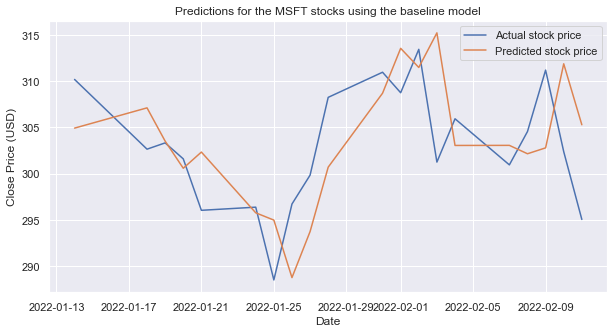

In [31]:
test_targets = np.array(test.Close).reshape(-1,1)

days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(baseline_net.predict(test_i))

###

sns.set()
fig = plt.figure(figsize = (10,5))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the MSFT stocks using the baseline model')
plt.legend(labels=["Actual stock price","Predicted stock price"])
plt.ylabel("Close Price (USD)")

plt.show()
fig.savefig('baseline.png') 
plt.close(fig) 
